In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Diabetes.csv")

In [4]:
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
!pip install lightgbm

In [7]:
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [14]:
lgbm_model = LGBMClassifier(verbose=-1).fit(X_train, y_train)

In [15]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbose': -1}

In [16]:
y_pred = lgbm_model.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.7207792207792207

**Model Tuning**

In [18]:
lgbm = LGBMClassifier()

In [19]:
lgbm_params = {'learning_rate': [0.001, 0.1, 0.01],
               'n_estimators':[200,100],
               'max_depth': [2,3,5,8]}

In [20]:
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [21]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

**Tuned model**

In [22]:
lgbm_tuned = LGBMClassifier(learning_rate=0.1, max_depth=3, n_estimators=100).fit(X_train, y_train)

In [23]:
y_pred = lgbm_tuned.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.7467532467532467

**Variable Significance Levels**

In [25]:
lgbm_tuned.feature_importances_

array([ 26, 113,  49,  46,  61,  95, 100,  86], dtype=int32)

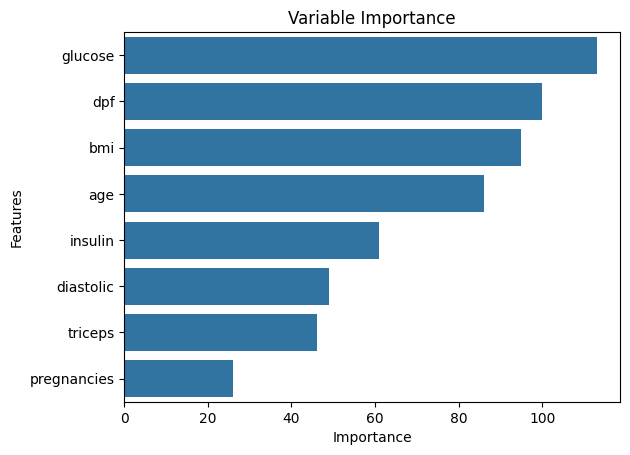

In [26]:
# Önem düzeylerini DataFrame'e çevir ve sıralama yap
feature_importances = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_},
                                    index=X_train.columns)

# Önem düzeylerini büyükten küçüğe sırala
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Barplot çizimi: x ekseni önem düzeyleri, y ekseni değişken isimleri
sns.barplot(x=feature_importances["Importance"], y=feature_importances.index)

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Variable Importance")
plt.show()
